<a href="https://colab.research.google.com/github/RANA1804/Introduction_to_machine_learning/blob/main/06_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Standardization - Feature Scaling**
Standardization, also known as z-score normalization or standard scaling, is a technique used in data preprocessing to rescale the features of a dataset. The goal of standardization is to transform the data so that it has a mean of 0 and a standard deviation of 1. This process helps to make the features more comparable and can be particularly useful in machine learning algorithms that are sensitive to the scale of the input features, such as gradient descent-based optimization algorithms.

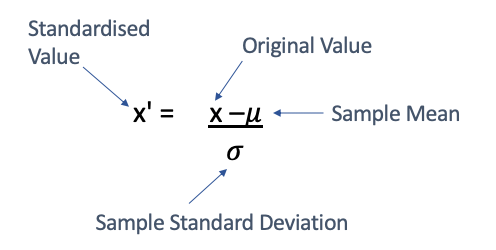

**1. Standard Deviation:**
The standard deviation (
) is a measure of the amount of variation or dispersion in a set of values. The formula for calculating the standard deviation of a sample is different from the formula for calculating the standard deviation of a population.

For  Sample and population Standard Deviation:

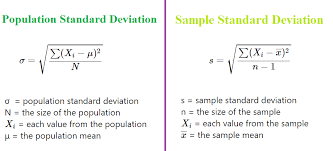

##**Z Score**
A Z-score, also known as a standard score, is a statistical measure that quantifies how far away a particular data point is from the mean (average) of a dataset when measured in terms of standard deviations. It's a way to standardize and normalize data, making it easier to compare values from different datasets or different parts of the same dataset.
  
 **Formula :-**                           
​
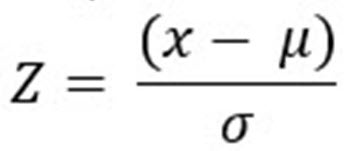


Here:

z is the z-score.

x is the individual data point.

μ is the mean of the dataset.

σ is the standard deviation of the dataset.

## **When to use Standardization?**

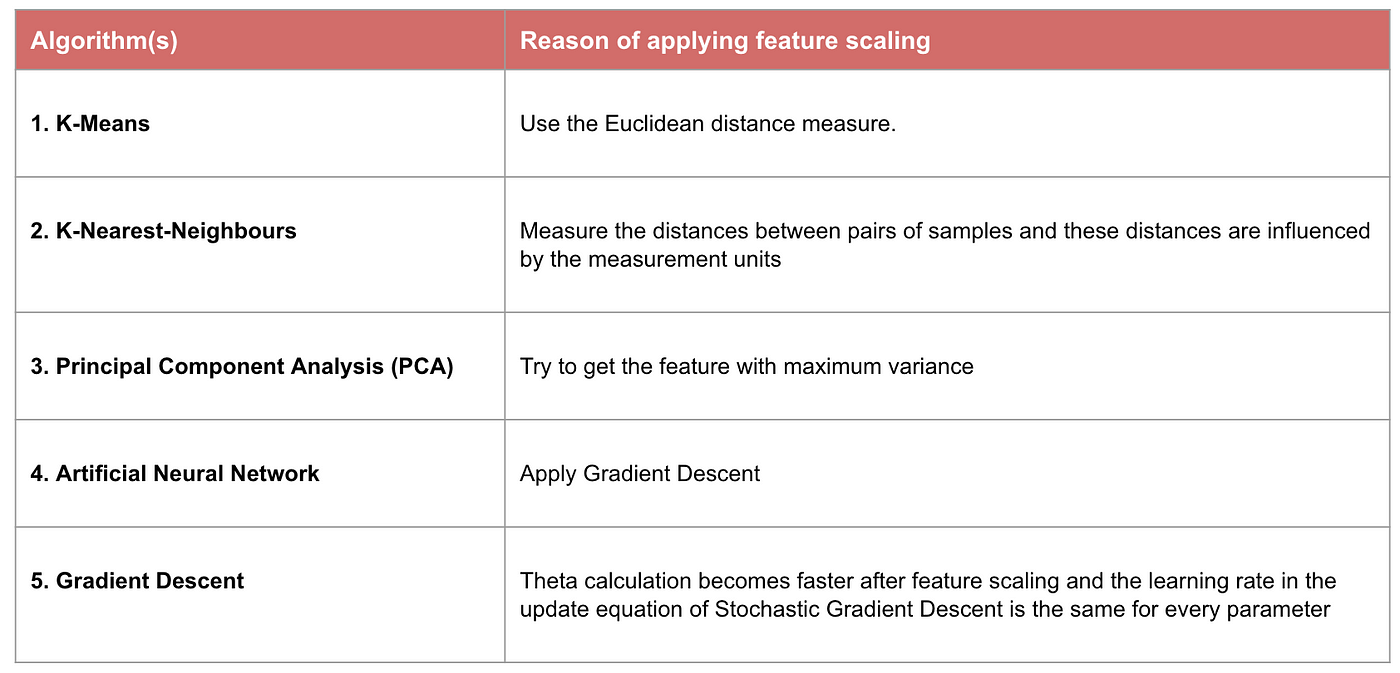

## **Example**
##Import Required Libraries

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # "sklearn" This is a library, "model_selection" this is a module, "train_test_split" this is a function
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn .tree import DecisionTreeClassifier

Mounted at /content/drive


## Read the Data

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/1.ML/datasets/Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
df.shape

(400, 3)

In [ ]:
# For machine learning we need to check the null values
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Simple vissualization of the raw data by scatter plot

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

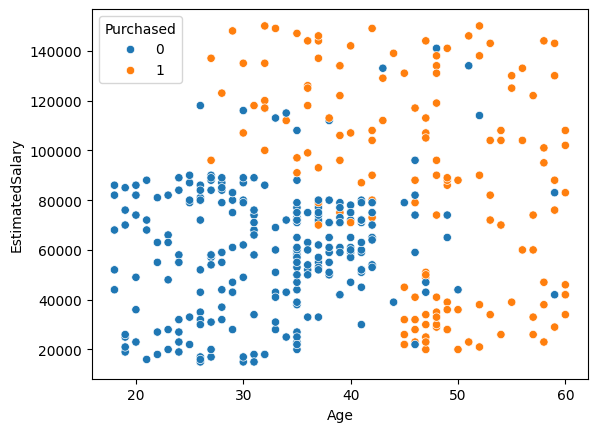

In [ ]:
sns.scatterplot(data = df, x = "Age", y = "EstimatedSalary", hue = "Purchased")

## Train Test Split

In [ ]:
# Input
x = df[["Age", "EstimatedSalary"]]
# Output
y = df["Purchased"]

In [ ]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
# # Split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 0)

# We can also apply this method:-
# x_train, x_test, y_train, y_test = train_test_split(df.drop("Purchased", axis = 1),
#                                                           df["Purchased"],
#                                                           test_size = 0.3,
#                                                           random_state = 0) # this is for count same values everitime

In [ ]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


## **Standard Scaler**
In scikit-learn, the StandardScaler is a preprocessing technique provided by the library for standardizing or scaling features in your dataset. It follows the standardization process discussed earlier, where it scales the features to have a mean of 0 and a standard deviation of 1. This is done to ensure that all features have the same scale, making them more suitable for machine learning algorithms that are sensitive to feature scales.

The fit method is typically called on a machine learning model or a data preprocessing object to adapt it to the specific dataset you are working with. Its purpose is to learn from the data and update the internal state of the object.

In [ ]:
# Instantiate a "StandardScaler" object
scaler = StandardScaler()

#Fit the scaler to the train set, it will learn the perameters
scaler.fit(x_train)

#Transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
scaler.var_

array([1.04038724e+02, 1.19572709e+09])

In [ ]:
# transform always returns a numpy array
x_train_scaled

In [ ]:
x_train.columns
x_test.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [ ]:
# Converting the scaled numpy arrays into pandas dataframes
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [ ]:
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [ ]:
# Describe the training data
x_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [ ]:
# Describe the scaled training data
x_train_scaled.describe().round(2) #The mean and the S.D will be 0 and 1.

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


## **Effect of Scalling**

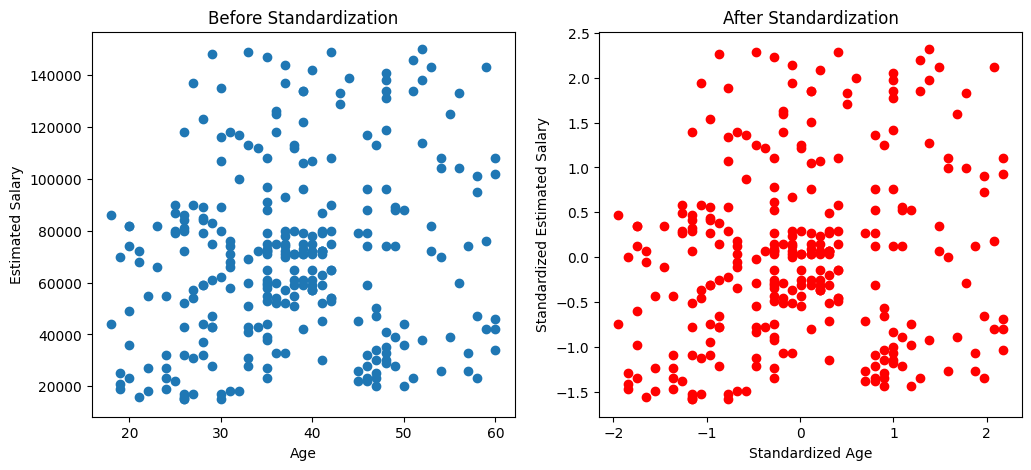

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12, 5))

# Creating a scatter plot of the training data
ax1.scatter(x = x_train["Age"], y = x_train["EstimatedSalary"])
ax1.set_title("Before Standardization")
ax1.set_xlabel("Age")
ax1.set_ylabel("Estimated Salary")

# Creating a scatter plot of the scalled training data
ax2.scatter(x = x_train_scaled["Age"], y = x_train_scaled["EstimatedSalary"], color = "red")
ax2.set_title("After Standardization")
ax2.set_xlabel("Standardized Age")
ax2.set_ylabel("Standardized Estimated Salary")
plt.show()

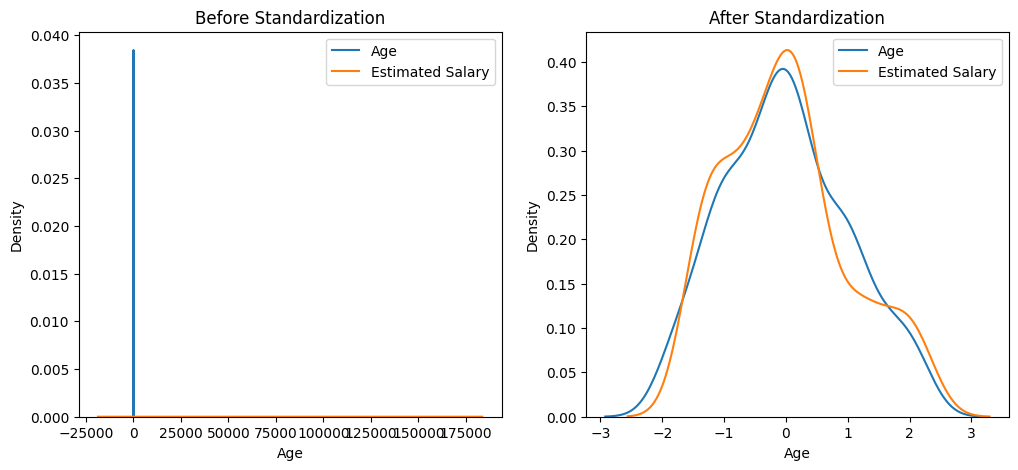

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Creating a probabilty density plot of the training data
ax1.set_title("Before Standardization")
sns.kdeplot(data=x_train["Age"], ax=ax1, label="Age")
sns.kdeplot(data=x_train["EstimatedSalary"], ax=ax1, label="Estimated Salary")
ax1.legend()

# Creating a probabilty density plot of the scaled training data
ax2.set_title("After Standardization")
sns.kdeplot(data=x_train_scaled["Age"], ax=ax2, label="Age")
sns.kdeplot(data=x_train_scaled["EstimatedSalary"], ax=ax2, label="Estimated Salary")
ax2.legend()

plt.show()

## Comparison of Distribution

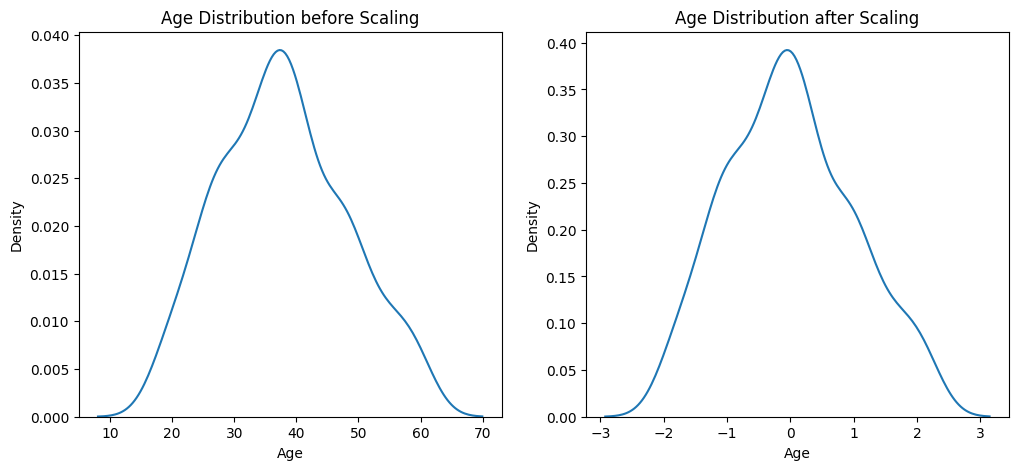

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Creating a probabilty density plot of the 'Age' column from the training data
sns.kdeplot(x_train["Age"], ax=ax1)
ax1.set_title("Age Distribution before Scaling")

# Creating a probabilty density plot of the 'Age' column from the scaled training data
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
ax2.set_title("Age Distribution after Scaling")

plt.show()

# **Why Scaling is Important?**

## Comperison on logistic Regrassion Model

In [ ]:
# Creating two logistic regression model for the training dataand scaled training data respectively
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
# Fitting the data to the models
lr.fit(X=x_train, y=y_train)
lr_scaled.fit(X=x_train_scaled, y=y_train)

LogisticRegression()

In [ ]:
# Predict the testing data
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_scaled

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
print("Accuracy Score on Actual Data:", accuracy_score(y_test, y_pred).round(2))
print("Accuracy Score on Scalled Data:", accuracy_score(y_pred, y_pred_scaled).round(2))

Accuracy Score on Actual Data: 0.66
Accuracy Score on Scalled Data: 0.71


## **Comparison on Decision Tree Model**

In [ ]:
# Creating Two Decision Tree Model for the training data and scaled training data respectively
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
# Fiting the data to the models
dt.fit(X = x_train, y = y_train)
dt_scaled.fit(X = x_train_scaled, y = y_train)

DecisionTreeClassifier()

In [ ]:
# Predict the testing data
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [ ]:
# Calculating the accuracy
print("Accuracy Score on Actual Data:", accuracy_score(y_test, y_pred).round(2))
print("Accuracy Score on scaled Data:", accuracy_score(y_test, y_pred_scaled).round(2))

Accuracy Score on Actual Data: 0.88
Accuracy Score on scaled Data: 0.88


##🤔 Note:
The accuracy improved after applying normalization to the Logistic Regression model because Logistic Regression is sensitive to the scale of input features, and normalization ensures a consistent and effective learning process by bringing all features to a similar scale. On the other hand, the Decision Tree model's accuracy remained unchanged because Decision Trees are inherently less sensitive to the scale of input features, as their splitting criteria depend on feature thresholds rather than absolute values. Therefore, normalization did not significantly impact the Decision Tree model's performance.

## Effect of Outlier
Standardization, by itself, does not handle outliers in the data. In fact, standardization can sometimes exacerbate the impact of outliers, making them more prominent in the scaled data. Standardization can be affected by outliers, and its sensitivity to extreme values may impact the resulting standardized values. Depending on the context and goals of the analysis, alternative scaling methods that are more robust to outliers might be considered.

In [ ]:
# Adding some outliers to the data
outliers = pd. DataFrame({"Age": [10, 90, 97], "EstimatedSalary": [1000, 250000, 350000], "Purchased": [0,1,1]})
outliers

In [ ]:
# Concat the outliers in the previous dataFrame
new_df = pd.concat([df, outliers])
new_df

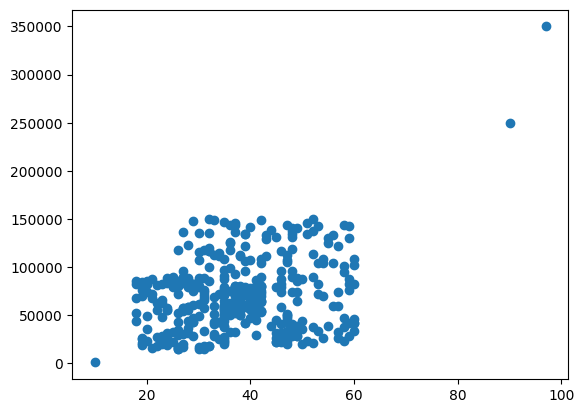

In [ ]:
# Create a scater plot
plt.scatter(x = new_df["Age"], y = new_df["EstimatedSalary"])
plt.show()

## Applying Staandardization

In [ ]:
# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(new_df.drop(["Purchased"], axis= 1),
                                                    new_df["Purchased"],
                                                    test_size = 0.3,
                                                    random_state = 0)
x_train.shape, x_test.shape

((282, 2), (121, 2))

In [ ]:
# Creating a standard scaler object
scaler = StandardScaler()

# Filtering the data
scaler.fit(x_train)

# Applying Standardization on the training and testing data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Converting the scaled data into pandas dataframe
x_train_scaled = pd.DataFrame(data = x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(data= x_test_scaled, columns = x_test.columns)
x_train_scaled.head().round(2)

,Age,EstimatedSalary
0,-0.66,-1.00
1,1.91,2.09
2,-0.11,1.92
3,-0.66,0.56
4,-0.02,-0.29


In [ ]:
x_test_scaled.head().round(2)

,Age,EstimatedSalary
0,-0.29,-1.34
1,0.35,0.17
2,-0.57,1.36
3,-0.93,0.51
4,-1.30,-0.32


Text(0, 0.5, 'Estimated Salary')

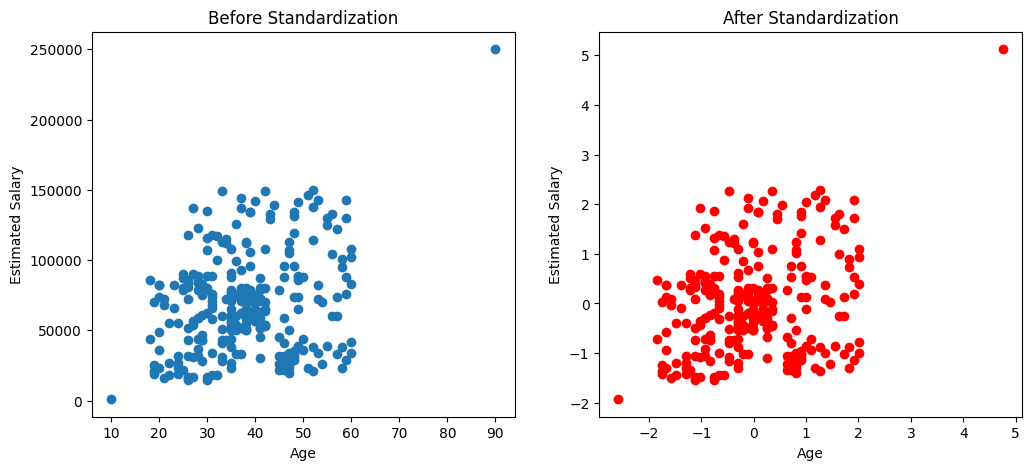

In [ ]:
# Plot the data
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))

# Ploting the x_train data
ax1.scatter(x = x_train["Age"], y=x_train["EstimatedSalary"])
ax1.set_title("Before Standardization")
ax1.set_xlabel("Age")
ax1.set_ylabel("Estimated Salary")

# Ploting the scaled x_train data
ax2.scatter(x=x_train_scaled["Age"], y=x_train_scaled["EstimatedSalary"], color="red")
ax2.set_title("After Standardization")
ax2.set_xlabel("Age")
ax2.set_ylabel("Estimated Salary")
